In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pprint import pprint

In [65]:
with open('city_search.json') as data_file:    
    data = json.load(data_file)

In [66]:
df = pd.DataFrame(data)

In [67]:
df.head()

,cities,session_id,unix_timestamp,user
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],[1442503708],"[[{'user_id': 2024, 'joining_date': '2015-03-2..."
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],[1441353991],"[[{'user_id': 2853, 'joining_date': '2015-03-2..."
2,[San Antonio TX],[SHTB4IYAX4PX6],[1440843490],"[[{'user_id': 10958, 'joining_date': '2015-03-..."
3,[Edmonton AB],[JBRB8MZGTX3M4],[1427268063],"[[{'user_id': 7693, 'joining_date': '2015-03-1..."
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],[1430559067],"[[{'user_id': 7506, 'joining_date': '2015-02-2..."


data manipulation

In [101]:
print (type(df.loc[df.index[0], 'user']))

<class 'list'>


In [68]:
df['user'] = df['user'].str.get(0)
df['user']=df['user'].str.get(0)

In [6]:
print (type(df.loc[df.index[0], 'user']))

<class 'dict'>


In [69]:
df=pd.concat([df.drop(['user'], axis=1), df['user'].apply(pd.Series)], axis=1)

In [7]:
df.head()

,cities,session_id,unix_timestamp,_row,country,joining_date,user_id
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],[1442503708],NaN,UK,2015-03-22,2024
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],[1441353991],NaN,DE,2015-03-28,2853
2,[San Antonio TX],[SHTB4IYAX4PX6],[1440843490],NaN,UK,2015-03-06,10958
3,[Edmonton AB],[JBRB8MZGTX3M4],[1427268063],NaN,IT,2015-03-12,7693
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],[1430559067],NaN,UK,2015-02-28,7506


In [70]:
df=df.drop(['_row'], axis=1)

In [9]:
df.head()

,cities,session_id,unix_timestamp,country,joining_date,user_id
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],[1442503708],UK,2015-03-22,2024
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],[1441353991],DE,2015-03-28,2853
2,[San Antonio TX],[SHTB4IYAX4PX6],[1440843490],UK,2015-03-06,10958
3,[Edmonton AB],[JBRB8MZGTX3M4],[1427268063],IT,2015-03-12,7693
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],[1430559067],UK,2015-02-28,7506


## 1. Which country is missing?

In [7]:
df.groupby('country')['cities'].count().reset_index().head()

,country,cities
0,,2820
1,DE,3638
2,ES,1953
3,FR,2298
4,IT,1882


In [11]:
#df['cities'] = df['cities'].str.get(0)

In [46]:
#pd.crosstab(index=df["cities"],columns=df["country"]).head()

In [47]:
#pd.crosstab(index=df["country"],columns=df["cities"])

In [71]:
#get time
import datetime
df['Time'] = df['unix_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x[0])).strftime('%Y-%m-%d %H:%M:%S'))
df=df.drop(['unix_timestamp'], axis=1)

In [72]:
#getting hours, minutes, seconds.....
df["Time"] = pd.to_datetime(df["Time"] )
column=df.ix[:,5]
feature_col1=pd.DataFrame({
              "month_clicked": column.dt.month,
              "day_clicked": column.dt.day,
              "dayofyear_clicked": column.dt.dayofyear,
            "hour_clicked":column.dt.hour,
             "minute_clicked":column.dt.minute,
             "second_clicked":column.dt.second
             })
df=pd.concat([df,feature_col1], axis=1)

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
#countriwise distribution
def country_vise(data,country):
    newd=df[df["country"]==country]
    newd.hist(column="hour_clicked")

Text(0.5,0,'missing')

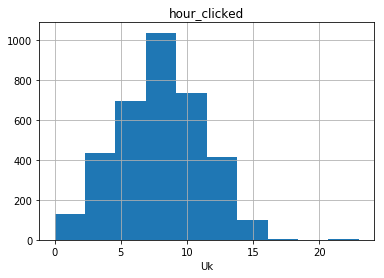

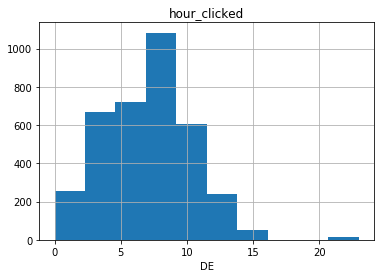

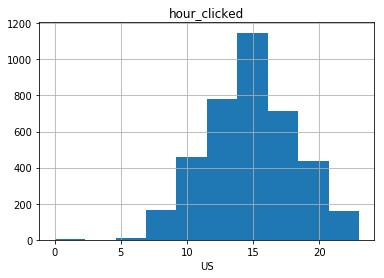

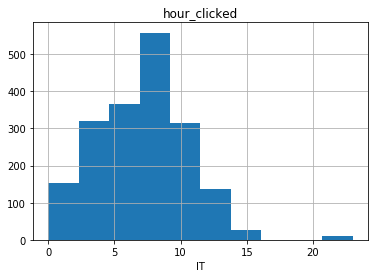

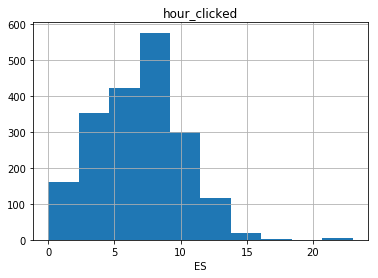

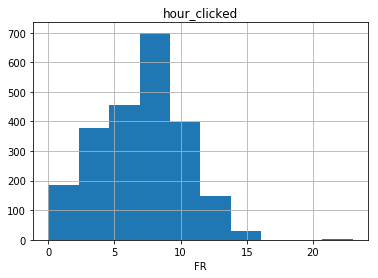

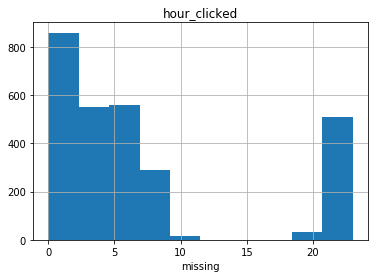

In [59]:
country_vise(df,"UK")
plt.xlabel('Uk')
country_vise(df,"DE")
plt.xlabel('DE')
country_vise(df,"US")
plt.xlabel('US')
country_vise(df,"IT")
plt.xlabel('IT')
country_vise(df,"ES")
plt.xlabel('ES')
country_vise(df,"FR")
plt.xlabel('FR')
country_vise(df,"" "")
plt.xlabel('missing')

Based on the skewed distribution compared to western countries, seems to be a country in asia. 

# Most likely city to be searched within same session 

In [74]:
df.head()

,cities,session_id,country,joining_date,user_id,Time,day_clicked,dayofyear_clicked,hour_clicked,minute_clicked,month_clicked,second_clicked
0,"[New York NY, Newark NJ]",[X061RFWB06K9V],UK,2015-03-22,2024,2015-09-17 11:28:28,17,260,11,28,9,28
1,"[New York NY, Jersey City NJ, Philadelphia PA]",[5AZ2X2A9BHH5U],DE,2015-03-28,2853,2015-09-04 04:06:31,4,247,4,6,9,31
2,[San Antonio TX],[SHTB4IYAX4PX6],UK,2015-03-06,10958,2015-08-29 06:18:10,29,241,6,18,8,10
3,[Edmonton AB],[JBRB8MZGTX3M4],IT,2015-03-12,7693,2015-03-25 03:21:03,25,84,3,21,3,3
4,"[Phoenix AZ, Houston TX]",[YJCMPURC2FL9C],UK,2015-02-28,7506,2015-05-02 05:31:07,2,122,5,31,5,7


In [75]:
#removing squared brackets from cities
df['cities']=df['cities'].str.get(0)

In [76]:
#split 'cities' column to multiple columns 
new=df.cities.str.split(",", expand=True)
df_new = pd.concat([df,new], axis=1)

In [77]:
df_new.head()

,cities,session_id,country,joining_date,user_id,Time,day_clicked,dayofyear_clicked,hour_clicked,minute_clicked,...,1,2,3,4,5,6,7,8,9,10
0,"New York NY, Newark NJ",[X061RFWB06K9V],UK,2015-03-22,2024,2015-09-17 11:28:28,17,260,11,28,...,Newark NJ,None,None,None,None,None,None,None,None,None
1,"New York NY, Jersey City NJ, Philadelphia PA",[5AZ2X2A9BHH5U],DE,2015-03-28,2853,2015-09-04 04:06:31,4,247,4,6,...,Jersey City NJ,Philadelphia PA,None,None,None,None,None,None,None,None
2,San Antonio TX,[SHTB4IYAX4PX6],UK,2015-03-06,10958,2015-08-29 06:18:10,29,241,6,18,...,None,None,None,None,None,None,None,None,None,None
3,Edmonton AB,[JBRB8MZGTX3M4],IT,2015-03-12,7693,2015-03-25 03:21:03,25,84,3,21,...,None,None,None,None,None,None,None,None,None,None
4,"Phoenix AZ, Houston TX",[YJCMPURC2FL9C],UK,2015-02-28,7506,2015-05-02 05:31:07,2,122,5,31,...,Houston TX,None,None,None,None,None,None,None,None,None


Item based collaborative filtering

In [16]:
from scipy.spatial.distance import cosine
def filfunc(dataframe,colname):
    data=pd.crosstab(index=dataframe["user_id"],columns=dataframe[colname]).reset_index()
    data_withoutUser = data.drop('user_id', 1)
    data_ibs = pd.DataFrame(index=data_withoutUser.columns,columns=data_withoutUser.columns)
    for i in range(0,len(data_ibs.columns)) :
        for j in range(0,len(data_ibs.columns)) :
            data_ibs.ix[i,j] = 1-cosine(data_withoutUser.ix[:,i],data_withoutUser.ix[:,j])
    # Create a placeholder items for closes neighbours to an item
    data_neighbours = pd.DataFrame(index=data_ibs.columns,columns=range(1,11))
    for i in range(0,len(data_ibs.columns)):
        data_neighbours.ix[i,:10] = data_ibs.ix[0:,i].sort_values(ascending=False)[:10].index
    return data_neighbours.head(6).ix[:6,2:4]   

In [51]:
filfunc(df_new,1)

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,2,3,4
1,,,
Anaheim CA,Montreal QC,Toronto ON,New York NY
Arlington TX,Sacramento CA,Jersey City NJ,Los Angeles CA
Atlanta GA,Madison WI,Oshawa ON,Buffalo NY
Austin TX,Toronto ON,Seattle WA,New York NY
Bakersfield CA,New York NY,Boston MA,Los Angeles CA
Baltimore MD,New York NY,Sacramento CA,Toronto ON


In [52]:
filfunc(df_new,2)

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,2,3,4
2,,,
Anaheim CA,Chicago IL,Vancouver BC,Hialeah FL
Arlington TX,Hamilton ON,Chandler AZ,Lexington KY
Atlanta GA,Scottsdale AZ,Windsor ON,Houston TX
Austin TX,Boston MA,London ON,Vancouver BC
Baltimore MD,Columbus OH,Sacramento CA,Toronto ON
Birmingham AL,Lexington KY,Milwaukee WI,Indianapolis IN


In [53]:
filfunc(df_new,3)

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,2,3,4
3,,,
Anaheim CA,Victoria BC,Jersey City NJ,Fresno CA
Arlington TX,Boston MA,Windsor ON,Seattle WA
Austin TX,Windsor ON,Jersey City NJ,Fresno CA
Bakersfield CA,Windsor ON,Jersey City NJ,Fresno CA
Baltimore MD,Portland OR,Buffalo NY,Santa Ana CA
Birmingham AL,Tucson AZ,Windsor ON,Jersey City NJ


In [54]:
filfunc(df_new,4)

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,2,3,4
4,,,
Anaheim CA,Cleveland OH,Fort Worth TX,Louisville KY
Arlington TX,Windsor ON,Fort Worth TX,Louisville KY
Atlanta GA,Newark NJ,Windsor ON,Glendale AZ
Austin TX,Newark NJ,Windsor ON,Glendale AZ
Baltimore MD,Oklahoma City OK,Windsor ON,Glendale AZ
Boston MA,Windsor ON,Fort Worth TX,Louisville KY


In [55]:
filfunc(df_new,5)

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,2,3,4
5,,,
Baltimore MD,San Antonio TX,Hamilton ON,Louisville KY
Buffalo NY,Windsor ON,Hamilton ON,Louisville KY
Chesapeake VA,Windsor ON,Hamilton ON,Louisville KY
Cincinnati OH,Windsor ON,Hamilton ON,Louisville KY
Cleveland OH,Windsor ON,Hamilton ON,Louisville KY
Dallas TX,Windsor ON,Hamilton ON,Louisville KY


In [33]:
filfunc(df_new,6)

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,2,3,4
6,,,
Arlington TX,WASHINGTON DC,Virginia Beach VA,Tulsa OK
Birmingham AL,WASHINGTON DC,Virginia Beach VA,Tulsa OK
Chesapeake VA,WASHINGTON DC,Virginia Beach VA,Tulsa OK
Cleveland OH,WASHINGTON DC,Virginia Beach VA,Tulsa OK
Columbus OH,WASHINGTON DC,Virginia Beach VA,Tulsa OK
Corpus Christi TX,WASHINGTON DC,Virginia Beach VA,Tulsa OK


# Refined solution 

In [78]:
#refined solution
df['cities']=df.cities.str.split(',')

In [91]:
import collections
from collections import Counter
def count_cities(df):
    c = Counter(city for cities in df.cities for city in cities)
    return pd.Series(c)
searchcity_by_user = df.groupby("user_id").apply(count_cities).unstack(fill_value=0)

In [99]:
searchcity_by_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5777 entries, 4 to 11000
Columns: 107 entries,  Anaheim CA to Vancouver BC
dtypes: int64(107)
memory usage: 4.8 MB


In [100]:
data_ibs = pd.DataFrame(index=searchcity_by_user.columns,columns=searchcity_by_user.columns)

In [102]:
# Lets fill in those empty spaces with cosine similarities
# Loop through the columns
for i in range(0,len(data_ibs.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_ibs.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs.ix[i,j] = 1-cosine(searchcity_by_user.ix[:,i],searchcity_by_user.ix[:,j])

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [103]:
# Create a placeholder items for closes neighbours to an item
data_neighbours = pd.DataFrame(index=data_ibs.columns,columns=range(1,11))
 
# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(data_ibs.columns)):
    data_neighbours.ix[i,:10] = data_ibs.ix[0:,i].sort_values(ascending=False)[:10].index

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [106]:
data_neighbours.head(6).ix[:6,2:4]

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,2,3,4
Anaheim CA,Santa Ana CA,Riverside CA,Long Beach CA
Arlington TX,Fort Worth TX,Plano TX,Austin TX
Atlanta GA,Birmingham AL,Memphis TN,Greensboro NC
Austin TX,San Antonio TX,Houston TX,San Antonio TX
Bakersfield CA,Fresno CA,San Jose CA,Los Angeles CA
Baltimore MD,WASHINGTON DC,Norfolk VA,New York NY
